In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_filled_1.csv")
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,Total_income_to_loan,Loan_by_Term
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,39.948867,360.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,47.585938,360.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,45.454545,360.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,41.175000,360.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,42.553191,360.0


In [3]:
df = df.drop("Unnamed: 0", axis=1)

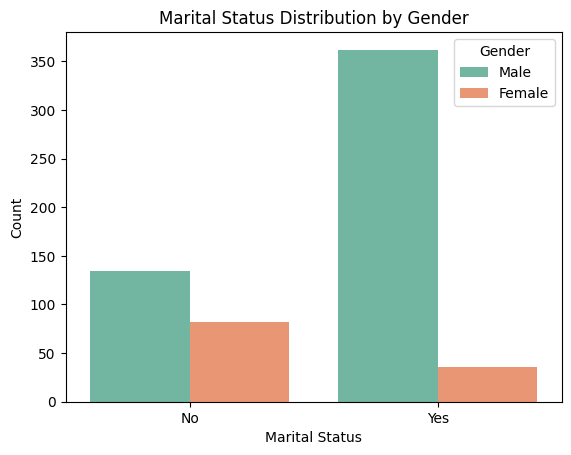

In [4]:
sns.countplot(x='Married', hue='Gender', data=df[["Gender","Married"]], palette='Set2')

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution by Gender')

# Show the plot
plt.show()

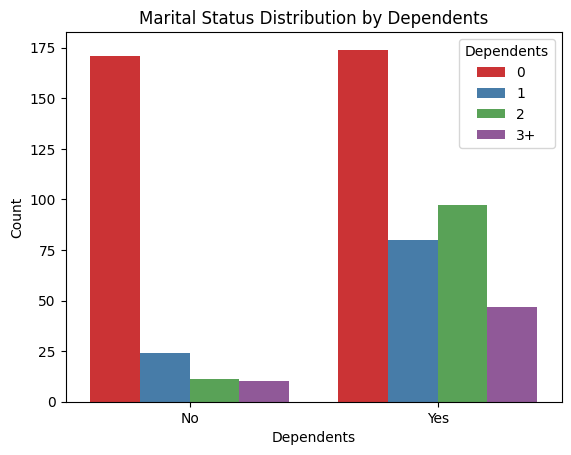

In [5]:
sns.countplot(x='Married', hue='Dependents', data=df[["Dependents","Married"]], palette='Set1')

# Add labels and title
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Marital Status Distribution by Dependents')

# Show the plot
plt.show()

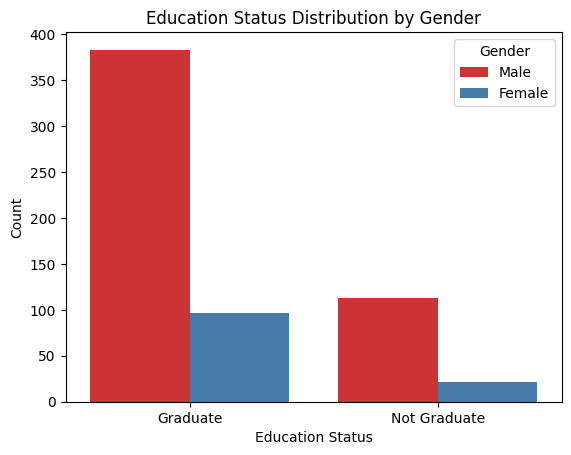

In [6]:
sns.countplot(x='Education', hue='Gender', data=df[["Gender","Education"]], palette='Set1')

# Add labels and title
plt.xlabel('Education Status')
plt.ylabel('Count')
plt.title('Education Status Distribution by Gender')

# Show the plot
plt.show()

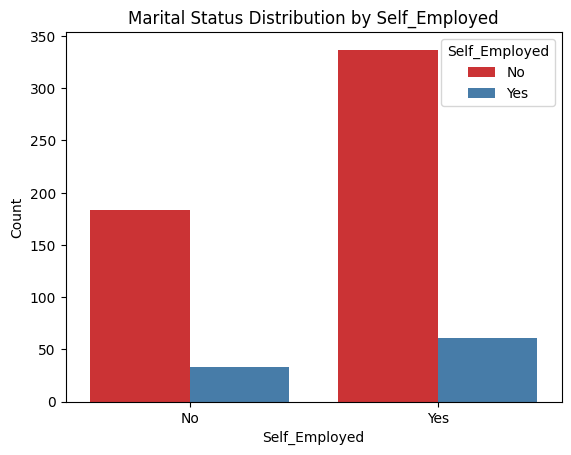

In [7]:
sns.countplot(x='Married', hue='Self_Employed', data=df[["Self_Employed","Married"]], palette='Set1')

# Add labels and title
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.title('Marital Status Distribution by Self_Employed')

# Show the plot
plt.show()

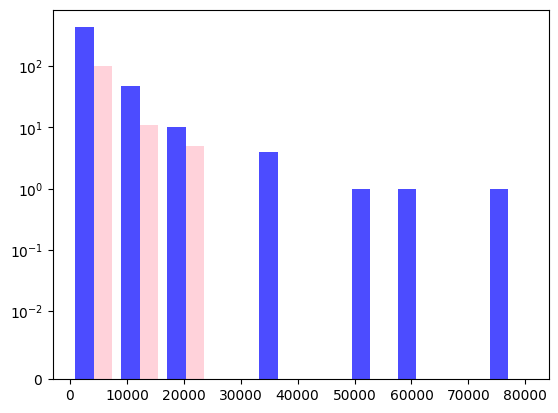

In [8]:
male_income = df[df['Gender'] == 'Male']['ApplicantIncome']
female_income = df[df['Gender'] == 'Female']['ApplicantIncome']
plt.hist([male_income, female_income], bins=10, color=['blue', 'pink'], label=['Male', 'Female'], alpha=0.7)
plt.yscale('symlog', linthresh=.01)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_11492\3114061299.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Half Correlation Heatmap')

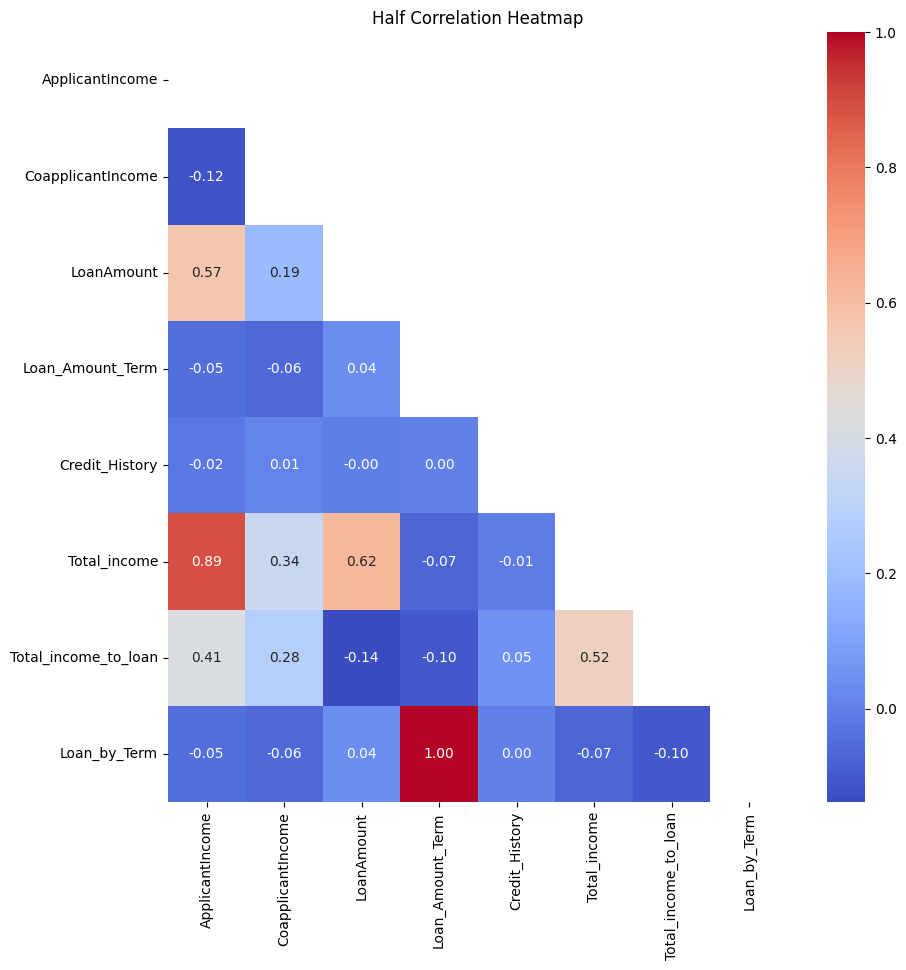

In [9]:
correlation_matrix = df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap with the mask
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)

# Add title
plt.title('Half Correlation Heatmap')

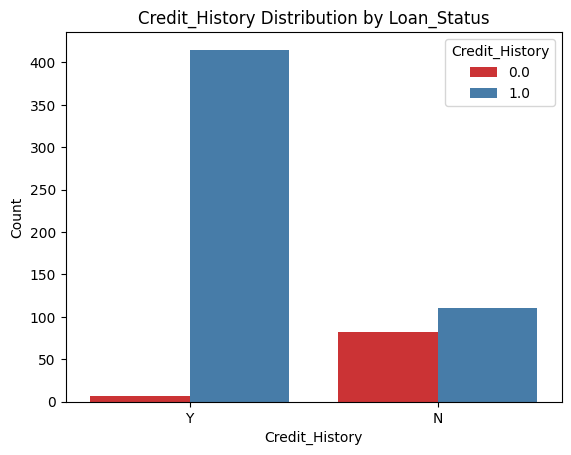

In [10]:
sns.countplot(x='Loan_Status', hue='Credit_History', data=df[["Loan_Status","Credit_History"]], palette='Set1')

# Add labels and title
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.title('Credit_History Distribution by Loan_Status')

# Show the plot
plt.show()

In [11]:
100*df.Loan_Status.value_counts()[0]/df.Loan_Status.value_counts().sum()

68.72964169381108

In [24]:
100*df['Loan_Status'][(df['Loan_Status']=='Y')&(df['Credit_History']==1)].value_counts()/df.Loan_Status[(df['Credit_History']==1)].value_counts().sum()

Y    79.047619
Name: Loan_Status, dtype: float64

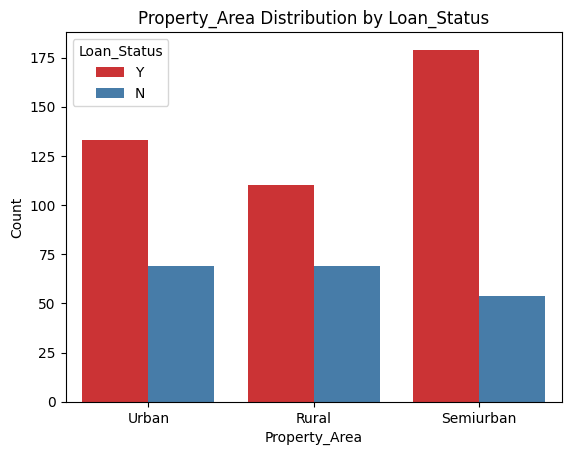

In [25]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df[["Property_Area","Loan_Status"]], palette='Set1')

# Add labels and title
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.title('Property_Area Distribution by Loan_Status')

# Show the plot
plt.show()

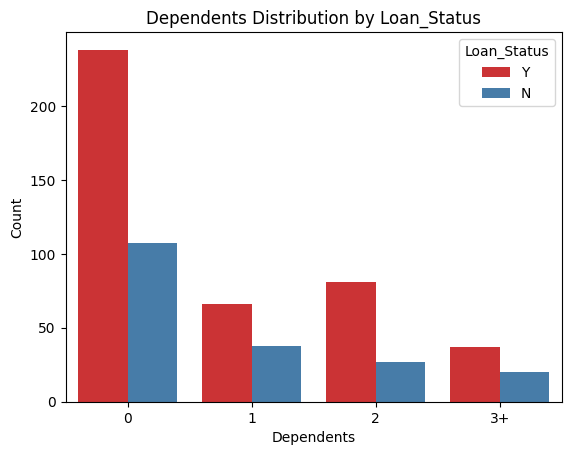

In [26]:
sns.countplot(x='Dependents', hue='Loan_Status', data=df[["Dependents","Loan_Status"]], palette='Set1')

# Add labels and title
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Dependents Distribution by Loan_Status')

# Show the plot
plt.show()

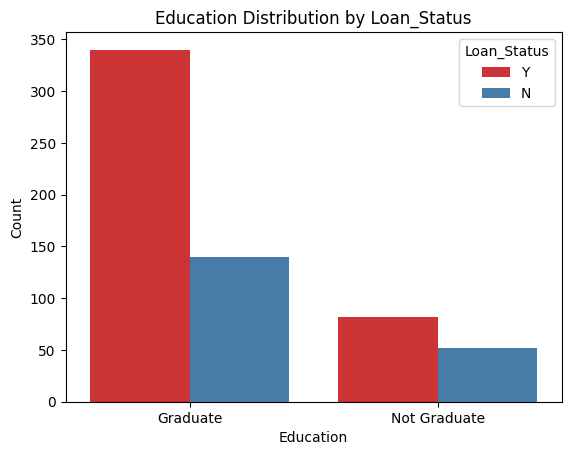

In [28]:
sns.countplot(x='Education', hue='Loan_Status', data=df[["Education","Loan_Status"]], palette='Set1')

# Add labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution by Loan_Status')

# Show the plot
plt.show()

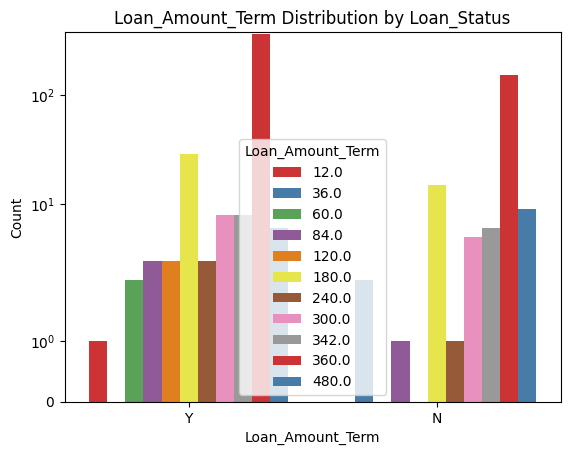

In [34]:
sns.countplot(x='Loan_Status', hue='Loan_Amount_Term', data=df[["Loan_Amount_Term","Loan_Status"]], palette='Set1')

# Add labels and title
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Count')
plt.title('Loan_Amount_Term Distribution by Loan_Status')
plt.yscale('symlog')
# Show the plot
plt.show()

Text(0.5, 1.0, 'Histogram of Loan Amount by Property Area')

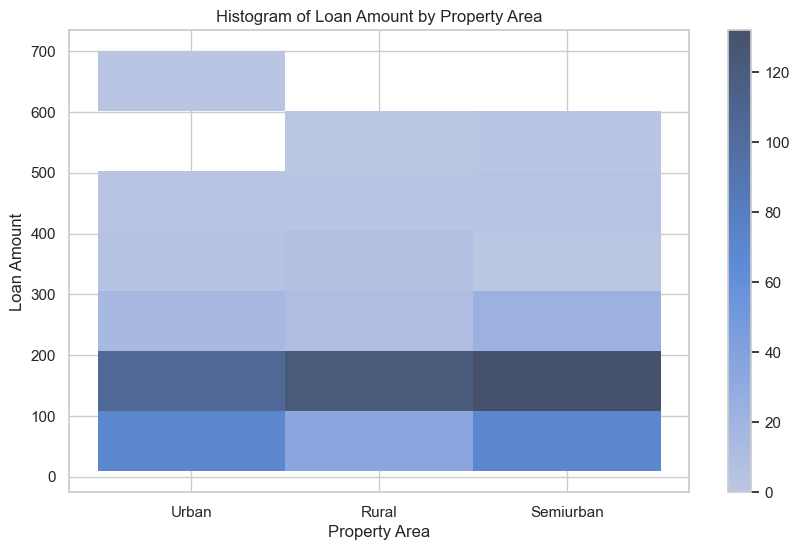

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Property_Area', y='LoanAmount', bins=7, cbar=True)

# Add labels and title
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.title('Histogram of Loan Amount by Property Area')

## Overall approval rate
### 68.72%
## Percentage of loan applicants with good credit history were approved for loans
### 79.04%